# Elekrolyseur Simulation 

C:\Users\Caj\AppData\Local\Temp\ipykernel_16324\1154992342.py:16: RuntimeWarning: divide by zero encountered in log
  konzentrationsverluste = -R * T / (2 * F) * np.log(1 - bereich / konzentration)


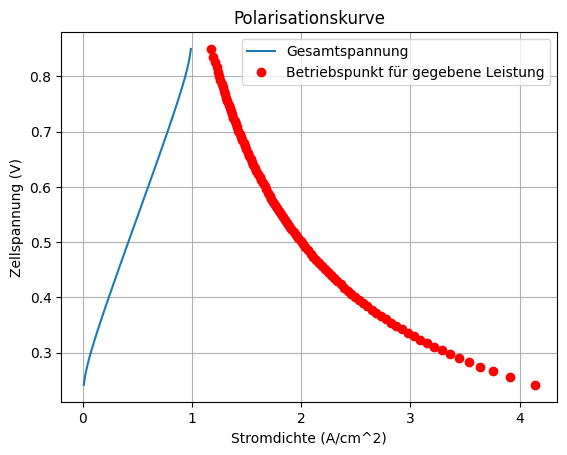

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter definieren
i0 = 1e-10  # Austauschstromdichte (A/cm^2)
R_intern = 0.5  # Interner Widerstand (Ohm*cm^2)
konzentration = 1  # Konzentration der Elektrolytlösung (mol/L)
F = 96485  # Faraday-Konstante (C/mol)
T = 298  # Temperatur (K)
R = 8.314  # Universelle Gaskonstante (J/mol*K)
bereich = np.linspace(0.01, 1, 100)  # Stromdichtenbereich (A/cm^2)

# Polarisationskurve berechnen
aktivierungsverluste = R * T / (2 * F) * np.log(bereich / i0)
ohmsche_verluste = R_intern * bereich
konzentrationsverluste = -R * T / (2 * F) * np.log(1 - bereich / konzentration)

# Gesamtspannung berechnen
gesamtspannung = aktivierungsverluste + ohmsche_verluste + konzentrationsverluste

# Eingangsleistung berücksichtigen
eingangsleistung = 100  # Eingangsleistung in Watt
flaeche = 100  # Fläche der Elektrolysezelle in cm^2
leistungsdichte = eingangsleistung / flaeche  # Leistungsdichte (W/cm^2)

# Stromdichte für gegebene Leistungsdichte finden
stromdichte_fuer_leistung = leistungsdichte / gesamtspannung

# Plot
plt.plot(bereich, gesamtspannung, label='Gesamtspannung')
plt.plot(stromdichte_fuer_leistung, gesamtspannung, 'ro', label='Betriebspunkt für gegebene Leistung')
plt.xlabel('Stromdichte (A/cm^2)')
plt.ylabel('Zellspannung (V)')
plt.title('Polarisationskurve')
plt.legend()
plt.grid(True)
plt.show()


## Konzentrationskurven 

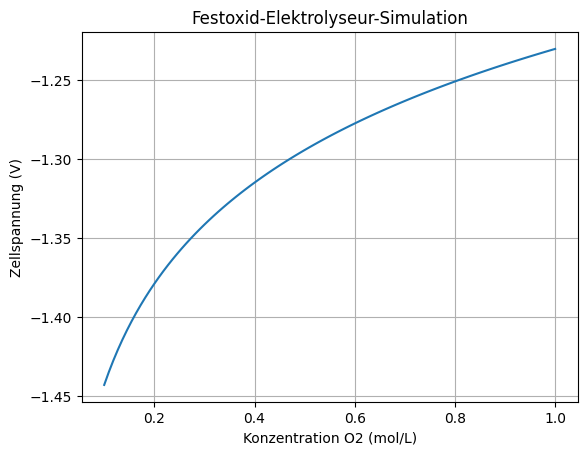

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanten
F = 96485  # Faraday-Konstante (C/mol)
R = 8.314  # Universelle Gaskonstante (J/mol·K)
T = 1073   # Temperatur (K) - hohe Temperatur für SOEC

# Elektrolysezelle
n = 2      # Anzahl der übertragenen Elektronen
E0 = 1.23  # Standard-Zellspannung (V)

# Berechnung der Zellspannung
def zellspannung(konzentration_o2):
    delta_G = -n * F * E0
    delta_G_prime = delta_G + n * R * T * np.log(konzentration_o2)
    U = delta_G_prime / (n * F)
    return U

# Konzentrationen (mol/L)
konzentration_o2 = np.linspace(0.1, 1, 100)

# Berechnung der Zellspannung für verschiedene Konzentrationen
zellspannungen = [zellspannung(o2) for o2 in konzentration_o2]

# Plot
plt.plot(konzentration_o2, zellspannungen)
plt.xlabel("Konzentration O2 (mol/L)")
plt.ylabel("Zellspannung (V)")
plt.title("Festoxid-Elektrolyseur-Simulation")
plt.grid(True)
plt.show()


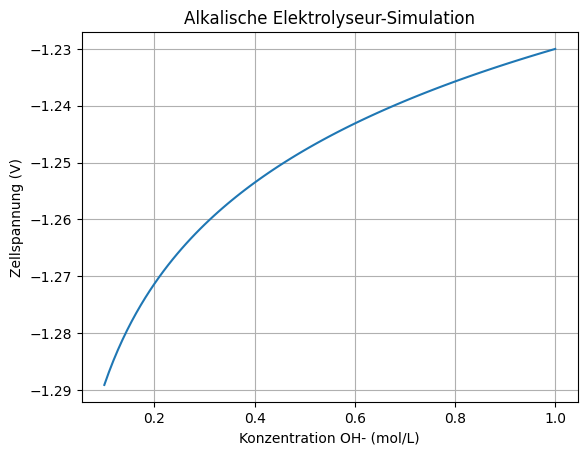

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanten
F = 96485  # Faraday-Konstante (C/mol)
R = 8.314  # Universelle Gaskonstante (J/mol·K)
T = 298    # Temperatur (K)

# Elektrolysezelle
n = 2      # Anzahl der übertragenen Elektronen
E0 = 1.23  # Standard-Zellspannung (V)

# Berechnung der Zellspannung
def zellspannung(konzentration_oh):
    delta_G = -n * F * E0
    delta_G_prime = delta_G + n * R * T * np.log(konzentration_oh)
    U = delta_G_prime / (n * F)
    return U

# Konzentrationen (mol/L)
konzentration_oh = np.linspace(0.1, 1, 100)

# Berechnung der Zellspannung für verschiedene Konzentrationen
zellspannungen = [zellspannung(oh) for oh in konzentration_oh]

# Plot
plt.plot(konzentration_oh, zellspannungen)
plt.xlabel("Konzentration OH- (mol/L)")
plt.ylabel("Zellspannung (V)")
plt.title("Alkalische Elektrolyseur-Simulation")
plt.grid(True)
plt.show()


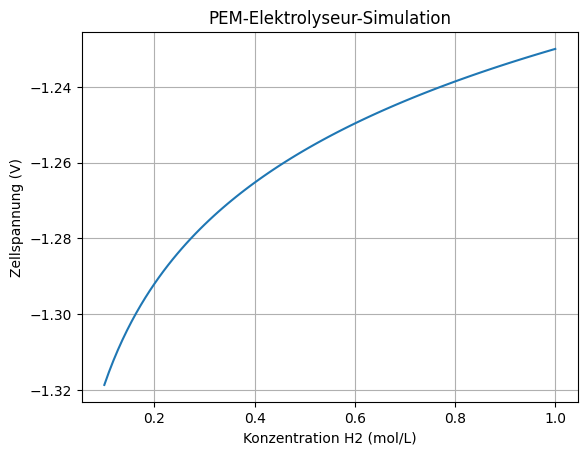

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanten
F = 96485  # Faraday-Konstante (C/mol)
R = 8.314  # Universelle Gaskonstante (J/mol·K)
T = 298    # Temperatur (K)

# Elektrolysezelle
n = 2      # Anzahl der übertragenen Elektronen (z. B. für H2O -> H2 + 1/2 O2: n = 2)
E0 = 1.23  # Standard-Zellspannung (V)

# Berechnung der Zellspannung
def zellspannung(konzentration_h2, konzentration_o2):
    delta_G = -n * F * E0
    delta_G_prime = delta_G + n * R * T * np.log(konzentration_h2 * (konzentration_o2 ** 0.5))
    U = delta_G_prime / (n * F)
    return U

# Konzentrationen (mol/L)
konzentration_h2 = np.linspace(0.1, 1, 100)
konzentration_o2 = np.linspace(0.1, 1, 100)

# Berechnung der Zellspannung für verschiedene Konzentrationen
zellspannungen = [zellspannung(h2, o2) for h2, o2 in zip(konzentration_h2, konzentration_o2)]

# Plot
plt.plot(konzentration_h2, zellspannungen)
plt.xlabel("Konzentration H2 (mol/L)")
plt.ylabel("Zellspannung (V)")
plt.title("PEM-Elektrolyseur-Simulation")
plt.grid(True)
plt.show()
